# TRANSFER LEARNING

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. You either use the pretrained model as is or use transfer learning to customize this model to a given task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.



# OBJECTIVE 

Expore **transfer learning**, and taken a look at regularization using **dropouts**

# INTRODUCTON 

* ### Inceptionv3
Inceptionv3 is a convolutional neural network for assisting in image analysis and object detection, and got its start as a module for Googlenet. It is the third edition of Google's Inception Convolutional Neural Network, originally introduced during the ImageNet Recognition Challenge. Just as ImageNet can be thought of as a database of classified visual objects, Inception helps classification of objects in the world of computer vision. One such use is in life sciences, where it aids in the research of Leukemia. It was "codenamed 'Inception' after the film of the same name"
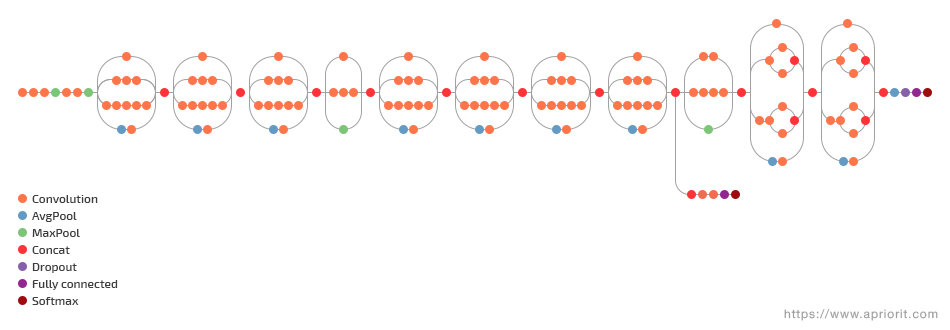

Downloads parameters of pre-trained model Inceptionv3

In [4]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  

--2020-09-28 15:45:38--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  61.8MB/s    in 1.4s    

2020-09-28 15:45:40 (61.8 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [5]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
#Instantiates the Inception v3 architecture.
 
pre_trained_model = InceptionV3(input_shape = (150,150,3),
                                include_top = False, #  Boolean, whether to include the fully-connected layer or softmax at the top, as the last layer of the network.
                                                     #  You are spectifing that you want to ignore this and get straight to the convolutions
                                weights = None  # random initialization
                                  )

local_weights_files = "/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

pre_trained_model.load_weights(local_weights_files) # load weights into the Inception v3 architecture

In [6]:
# iteration through its layers and lock them 
for layer in pre_trained_model.layers :
  layer.trainable = False

In [7]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

we can see the number of trainalble parameters is 0  



In [15]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [16]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])


In [8]:
cd /content/drive/My Drive/deep_learning_exercise/Convolution_in_Tensorflow/cats_and_dogs_Kaggle/cats_and_dogs_filtered  

/content/drive/My Drive/deep_learning_exercise/Convolution_in_Tensorflow/cats_and_dogs_Kaggle/cats_and_dogs_filtered


In [9]:
ls

cat1.jpeg     cat2.jpeg  dog1.jpg     train/       vectorize.py
cat.2007.jpg  cat2.jpg   dog.695.jpg  validation/


In [10]:
train_dir = "./train"
validation_dir = "./validation"

train_cats_dir = "./train/cats/"
train_dogs_dir = "./train/dogs/"
valid_cats_dir = "./validation/cats/"
valid_dogs_dir = "./validation/dogs/"

In [11]:
train_dogs_fnames = os.listdir(train_dogs_dir)
train_cats_fnames = os.listdir(train_cats_dir)

print(train_cats_fnames[:10])
print(train_dogs_fnames[:10])

['cat.585.jpg', 'cat.588.jpg', 'cat.589.jpg', 'cat.587.jpg', 'cat.584.jpg', 'cat.594.jpg', 'cat.593.jpg', 'cat.591.jpg', 'cat.590.jpg', 'cat.592.jpg']
['dog.583.jpg', 'dog.584.jpg', 'dog.586.jpg', 'dog.592.jpg', 'dog.593.jpg', 'dog.590.jpg', 'dog.59.jpg', 'dog.591.jpg', 'dog.588.jpg', 'dog.589.jpg']


In [13]:
print("total training dogs images",len(os.listdir(train_dogs_dir)))
print("total training cats images",len(os.listdir(train_dogs_dir)))
print("total validation dogs images",len(os.listdir(valid_dogs_dir)))
print("total validation dogs images",len(os.listdir(valid_dogs_dir)))

total training dogs images 1000
total training cats images 1000
total validation dogs images 500
total validation dogs images 500


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
valid_datagen = ImageDataGenerator(rescale=1./255.0)

train_datagen = ImageDataGenerator(
      rescale = 1./255.0,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                class_mode = "binary",
                                target_size = (150,150),
                                batch_size = 20)


valid_generator = valid_datagen.flow_from_directory(validation_dir,
                                class_mode = "binary",
                                target_size = (150,150),
                                batch_size = 10)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
history = model.fit_generator(train_generator,
                    validation_data = valid_generator,
                    epochs = 20,
                    verbose = 1
                    )

Epoch 1/20
100/100 [==============================] - 1960s 20s/step - loss: 0.3700 - accuracy: 0.8635 - val_loss: 0.1097 - val_accuracy: 0.9570
Epoch 2/20
100/100 [==============================] - 22s 220ms/step - loss: 0.2122 - accuracy: 0.9155 - val_loss: 0.1487 - val_accuracy: 0.9450
Epoch 3/20
100/100 [==============================] - 22s 219ms/step - loss: 0.2082 - accuracy: 0.9255 - val_loss: 0.1106 - val_accuracy: 0.9660
Epoch 4/20
100/100 [==============================] - 22s 222ms/step - loss: 0.1760 - accuracy: 0.9355 - val_loss: 0.1192 - val_accuracy: 0.9600
Epoch 5/20
100/100 [==============================] - 22s 225ms/step - loss: 0.2030 - accuracy: 0.9330 - val_loss: 0.1277 - val_accuracy: 0.9560
Epoch 6/20
100/100 [==============================] - 22s 222ms/step - loss: 0.1648 - accuracy: 0.9455 - val_loss: 0.1295 - val_accuracy: 0.9660
Epoch 7/20
100/100 [==============================] - 22s 221ms/step - loss: 0.1654 - accuracy: 0.9450 - val_loss: 0.0906 - val_ac

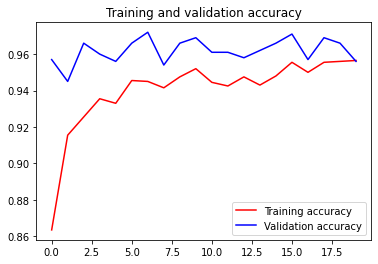

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()